# [Exercise 0](https://colab.research.google.com/github/kokchun/Maskininlarning-AI21/blob/main/Exercises/E00_linear_regression.ipynb#scrollTo=XaaBo62vK1Bp)

In [1]:
import matplotlib.pyplot as pyplot
import numpy
import pandas
import seaborn

## 0

### a)

In [2]:
numpy.random.seed(42)
x_minutes_per_month = numpy.abs(numpy.random.normal(loc=100, scale=100, size=(400)))
x_minutes_per_month[:5]

array([149.6714153 ,  86.17356988, 164.76885381, 252.30298564,
        76.58466253])

In [3]:
randomized_error = numpy.random.normal(loc=0, scale=50, size=(400))
randomized_error[:5]

array([-79.72138294, -29.96875115,   0.26218499,   2.34902969,
       -22.50327357])

In [4]:
y_sek_per_month = 2 * x_minutes_per_month + 25 + randomized_error

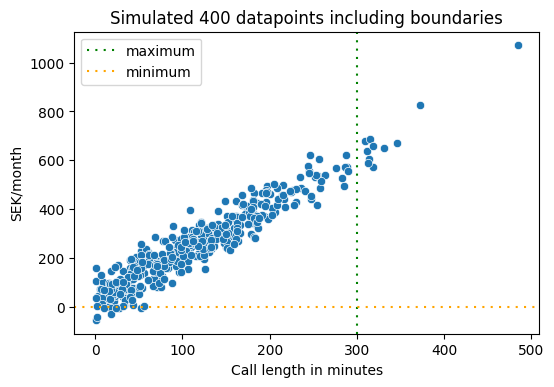

In [5]:
fig, ax = pyplot.subplots(dpi=100)
seaborn.scatterplot(x=x_minutes_per_month, y=y_sek_per_month)
ax.set(
    title="Simulated 400 datapoints including boundaries",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
ax.axvline(300, dashes=(1, 3), color="green", label="maximum")
ax.axhline(0, dashes=(1, 3), color="orange", label="minimum")
ax.legend()

### b)

In [6]:
# remove over 300 min
# remove costs that are negative
clean_statement = (0 <= y_sek_per_month) & (x_minutes_per_month <= 300)
x_minutes_per_month_cleaned = x_minutes_per_month[clean_statement]
y_sek_per_month_cleaned = y_sek_per_month[clean_statement]
len(x_minutes_per_month_cleaned), len(y_sek_per_month_cleaned), len(x_minutes_per_month), len(y_sek_per_month)

(381, 381, 400, 400)

In [7]:
y_sek_per_month_ground_truth = 2 * x_minutes_per_month + 25

(0.0, 300.0)

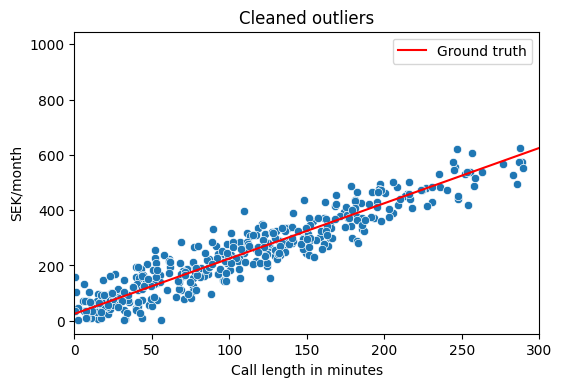

In [8]:
fig, ax = pyplot.subplots(dpi=100)
seaborn.scatterplot(x=x_minutes_per_month_cleaned, y=y_sek_per_month_cleaned)
seaborn.lineplot(x=x_minutes_per_month, y=y_sek_per_month_ground_truth, color='red', label='Ground truth')
ax.set(
    title="Cleaned outliers",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
ax.legend()
pyplot.xlim(0,300)

### c)

In [9]:
y_sek_per_month_cleaned.shape, x_minutes_per_month_cleaned.shape

((381,), (381,))

In [10]:
phone_data_month = pandas.DataFrame({'Minutes':x_minutes_per_month_cleaned, 'Cost':y_sek_per_month_cleaned})
phone_data_month.head()

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1

### a) b)

In [11]:
def train_test_split(
    X: pandas.DataFrame,
    y: pandas.DataFrame,
    train_fraction: float = 0.7,
    random_state: int = 42,
    replace=False,
):
    def sample(df: pandas.DataFrame):
        return df.sample(n=int(len(df) * train_fraction), random_state=random_state, replace=replace)

    def select_not_in_list(original: pandas.DataFrame, filtering_data_frame: pandas.DataFrame):
        return original.drop(filtering_data_frame.index)

    X_train, y_train = (sample(X), sample(y))

    X_test, y_test = (select_not_in_list(X, X_train), select_not_in_list(y, y_train))

    return {
        "train_data": {"X": pandas.DataFrame(X_train), "y": y_train},
        "test_data": {"X": pandas.DataFrame(X_test), "y": y_test},
    }


phone_data_month_train_test_split = train_test_split(
    X=(phone_data_month["Minutes"]),
    y=(phone_data_month["Cost"]),
)
train_data = phone_data_month_train_test_split["train_data"]
test_data = phone_data_month_train_test_split["test_data"]


train_data["X"].shape, train_data["y"].shape, test_data["X"].shape, test_data["y"].shape

((266, 1), (266,), (115, 1), (115,))

## 2

In [12]:
train_data['X']

,Minutes
266,39.978312
192,11.614256
46,53.936123
55,193.128012
57,69.078762
...,...
41,117.136828
294,227.766490
206,213.556564
254,74.743185


In [13]:
def simple_linear_regression(X: pandas.DataFrame, y: pandas.Series) -> pandas.Series:
    return numpy.linalg.inv(X.T @ X) @ X.T @ y


def add_intercept_column(X: pandas.DataFrame) -> pandas.DataFrame:
    X_with_intercept = X.assign(intercept=1)
    X_with_intercept_column_names = list(X_with_intercept.columns)
    return X_with_intercept[X_with_intercept_column_names[-1:] + X_with_intercept_column_names[:-1]]


def predict(X, weights):
    return X @ weights

add_intercept_column(train_data["X"])

,intercept,Minutes
266,1,39.978312
192,1,11.614256
46,1,53.936123
55,1,193.128012
57,1,69.078762
...,...,...
41,1,117.136828
294,1,227.766490
206,1,213.556564
254,1,74.743185


In [14]:
weights = simple_linear_regression(add_intercept_column(train_data["X"]), train_data["y"]) # beta_hat
weights

0    32.221477
1     1.910506
dtype: float64

In [15]:
train_data["X"].shape, weights.shape

((266, 1), (2,))

In [16]:
add_intercept_column(train_data["X"]).shape, weights.shape

((266, 2), (2,))

In [17]:
train_regression_line = predict(add_intercept_column(train_data["X"]).to_numpy(), weights)

In [18]:
weights # two rows

0    32.221477
1     1.910506
dtype: float64

In [19]:
add_intercept_column(train_data["X"]) # two columns

,intercept,Minutes
266,1,39.978312
192,1,11.614256
46,1,53.936123
55,1,193.128012
57,1,69.078762
...,...,...
41,1,117.136828
294,1,227.766490
206,1,213.556564
254,1,74.743185


In [20]:
train_regression_line.shape

(266,)

<AxesSubplot:title={'center':'Regression line calculated using normal equation on training data'}, xlabel='Call length in minutes', ylabel='SEK/month'>

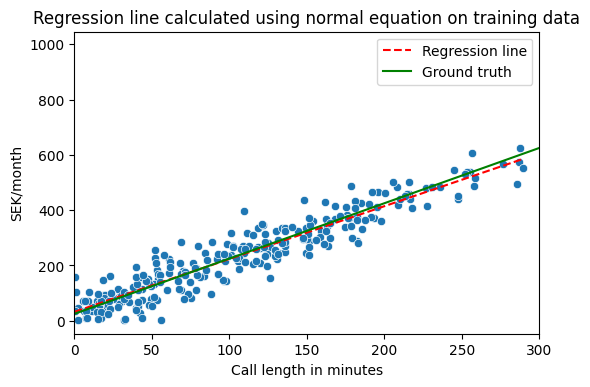

In [21]:
def data_scatter_and_regression_line_plot(
    data: tuple,
    regression_line: pandas.Series,
    regression_line_name="Regression line",
    title="Set title",
    xlabel="Set x label",
    ylabel="Set ylabel",
):
    fig, ax = pyplot.subplots(dpi=100)
    seaborn.scatterplot(x=data[0], y=data[1])
    seaborn.lineplot(
        x=data[0],
        y=regression_line,
        color="red",
        label=regression_line_name,
    )
    ax.lines[0].set_linestyle("--")
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    ax.legend()
    pyplot.xlim(0, 300)


data_scatter_and_regression_line_plot(
    (train_data["X"]["Minutes"], train_data["y"]),
    train_regression_line,
    title="Regression line calculated using normal equation on training data",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
seaborn.lineplot(
    x=x_minutes_per_month,
    y=y_sek_per_month_ground_truth,
    color="green",
    label="Ground truth",
)

## 3

### a)

<AxesSubplot:title={'center':'Regression line calculated using normal equation on test data'}, xlabel='Call length in minutes', ylabel='SEK/month'>

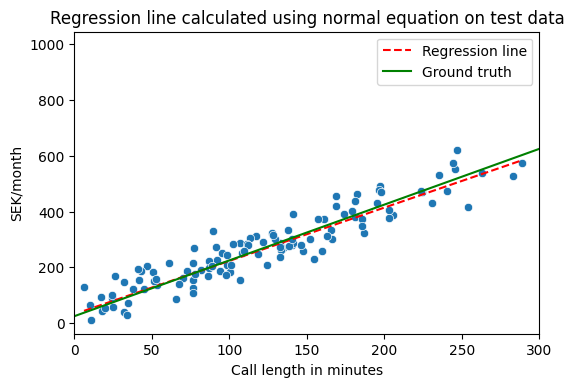

In [22]:
test_regression_line = predict(add_intercept_column(test_data["X"]).to_numpy(), weights)

data_scatter_and_regression_line_plot(
    (test_data["X"]["Minutes"], test_data["y"]),
    test_regression_line,
    title="Regression line calculated using normal equation on test data",
    xlabel="Call length in minutes",
    ylabel="SEK/month",
)
seaborn.lineplot(
    x=x_minutes_per_month,
    y=y_sek_per_month_ground_truth,
    color="green",
    label="Ground truth",
)

In [23]:
def calculate_MAE(regression_line, y_test_data):
    return 1 / len(y_test_data) * numpy.sum(numpy.abs(regression_line - y_test_data))

def calculate_MSE(regression_line, y_test_data):
    return 1 / len(y_test_data) * numpy.sum(numpy.power(y_test_data - regression_line, 2))

def calculate_RMSE(regression_line, y_test_data):
    return numpy.sqrt(1 / len(y_test_data) * numpy.sum(numpy.power(y_test_data - regression_line, 2)))

calculate_MAE(test_regression_line, test_data['y']), calculate_MSE(test_regression_line, test_data['y']), calculate_RMSE(test_regression_line, test_data['y'])

(40.12002651149212, 2401.577128867729, 49.00588871623214)